# Sports data analysis

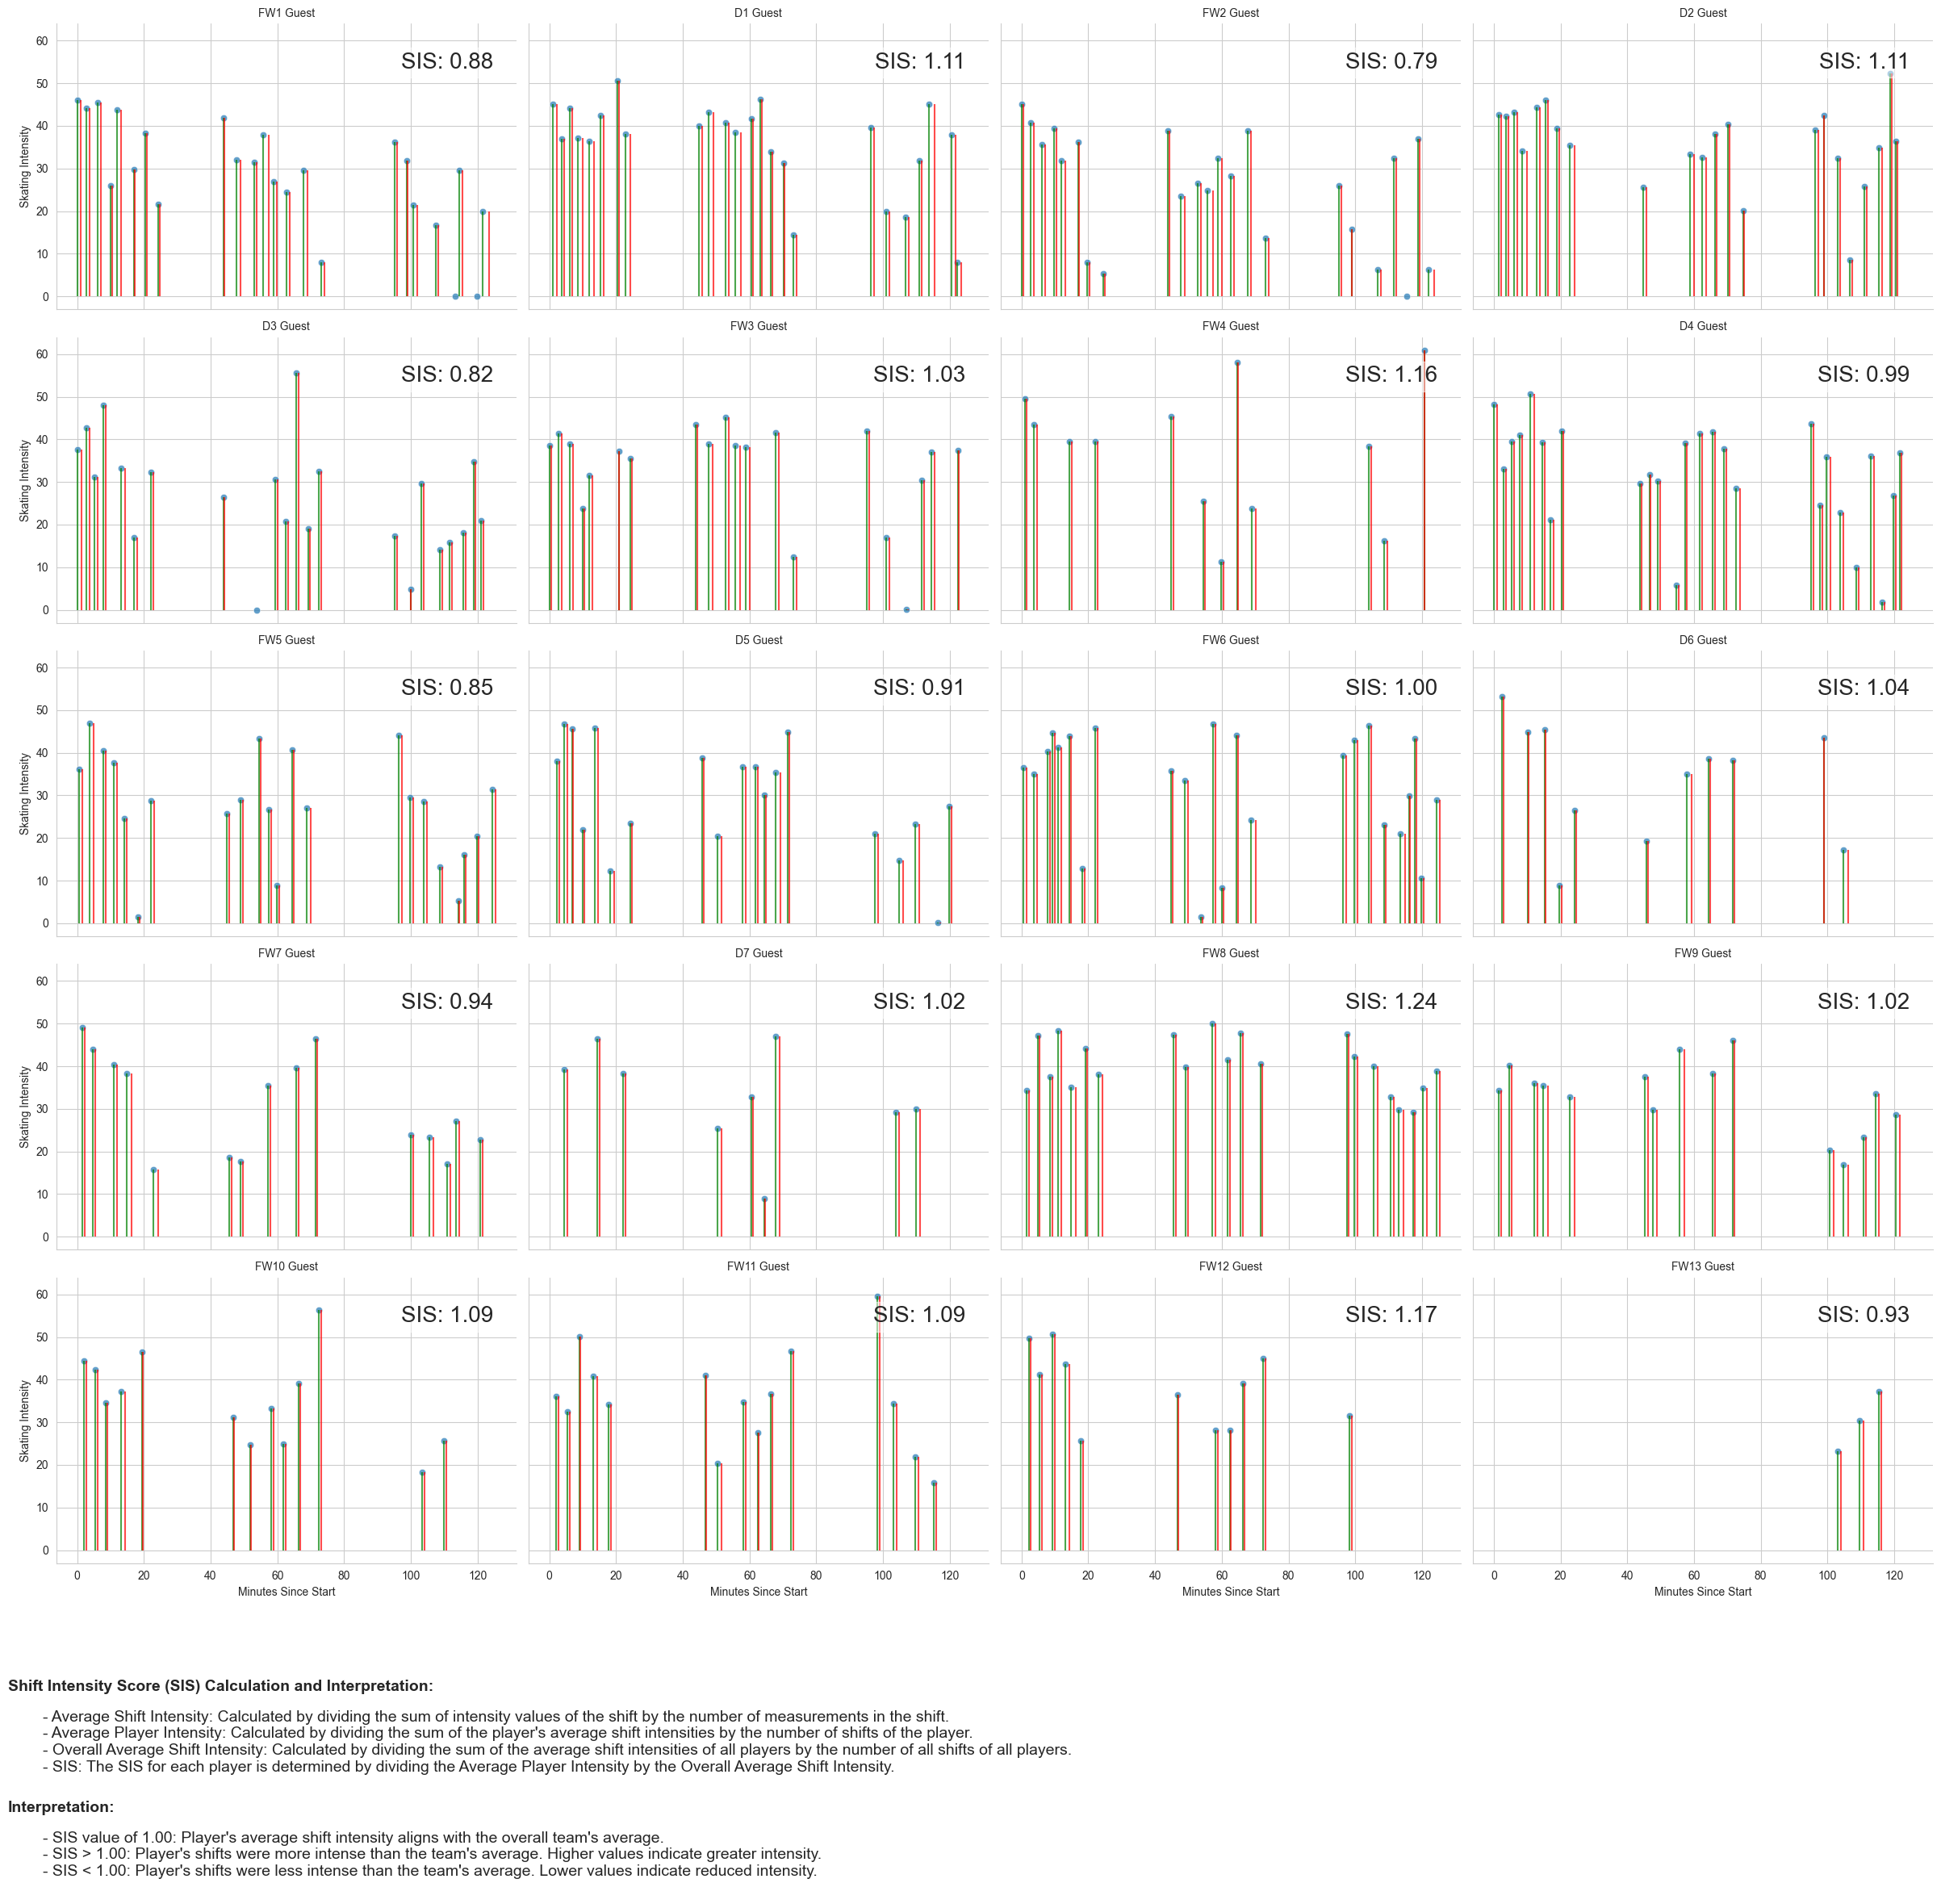

In [1]:
from utils import read_file, add_sis_column, plot_skating_intensity
FILE = "data/Events-Match_Test__TEAM_A_vs__TEAM_B-Period_Period_1_Period_Period_2_Period_Period_3.csv"
EVENT_TYPE = "Shifts"

df = read_file(FILE, EVENT_TYPE)  # Implement your own read_file function

df_with_sis = add_sis_column(df)  # Implement your own add_sis_column function

    # Player selection
selected_players = df_with_sis[df_with_sis['Name'].str.contains("Guest")]['Name'].unique().tolist()

plot_skating_intensity(df_with_sis, selected_players, 0, 130)

### Calculate the average intensity for each shift of a player:

$$
\text{Average Shift Intensity} = \frac{\sum (\text{Intensity values of the shift})}{\text{Number of measurements in the shift}}
$$

### Calculate the average intensity of all shifts for a player:

$$
\text{Average Player Intensity} = \frac{\sum (\text{Average shift intensities of the player})}{\text{Number of shifts of the player}}
$$

### Calculate the average value of intensities for all shifts of all players:

$$
\text{Overall Average Shift Intensity} = \frac{\sum (\text{Average shift intensities of all players})}{\text{Number of all shifts of all players}}
$$

### Determine the Shift Intensity Score (SIS) for each player:

$$
\text{SIS} = \frac{\text{Average Player Intensity}}{\text{Overall Average Shift Intensity}}
$$


Note: The calculation provide a relative value of shift intensity (based on skating intensity) for each player, representing their performance compared to the average of other players. The SIS (Shift Intensity Score) can then be used to analyze which players have particularly intense or less intense shifts. The values can be visualized to more easily identify trends or patterns.


## Shift Intensity Score (SIS) Interpretation

The SIS provides insights into each player's performance relative to the team average. It can be interpreted as follows:

- **SIS value of 1.00**: Indicates that the player's average shift intensity aligns precisely with the overall team's average.

- **SIS value greater than 1.00**: Signifies that the player's shifts were more intense than the team's average intensity. A higher value suggests a greater intensity level.

- **SIS value less than 1.00**: Implies that the player's shifts were less intense than the team's average intensity. A lower value indicates a reduced level of intensity.

### Examples:

- A player with an **SIS of 0.88** had shifts that were less intense compared to the team's average.
- A player with an **SIS of 1.24** experienced shifts substantially more intense than the team's average.

### Utilization:

These metrics are particularly valuable for:

- **Assessing Performance**: Gauging players' activity levels and contribution during games.
- **Strategizing Recovery**: Identifying players who may require additional rest.
- **Training Adjustments**: Determining who could potentially handle increased workloads.

By analyzing SIS values, coaches and trainers can tailor strategies to optimize both individual and team performance.
